# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Ashutosh Desai
*   **Student number**: 1004774041



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549


1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? **[1]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots_adjust
from sklearn.preprocessing import StandardScaler

In [ ]:
all_countries = cases_raw.index
all_dates = cases_raw.columns
plot_dates = np.arange(0,len(all_dates))
#plot_dates

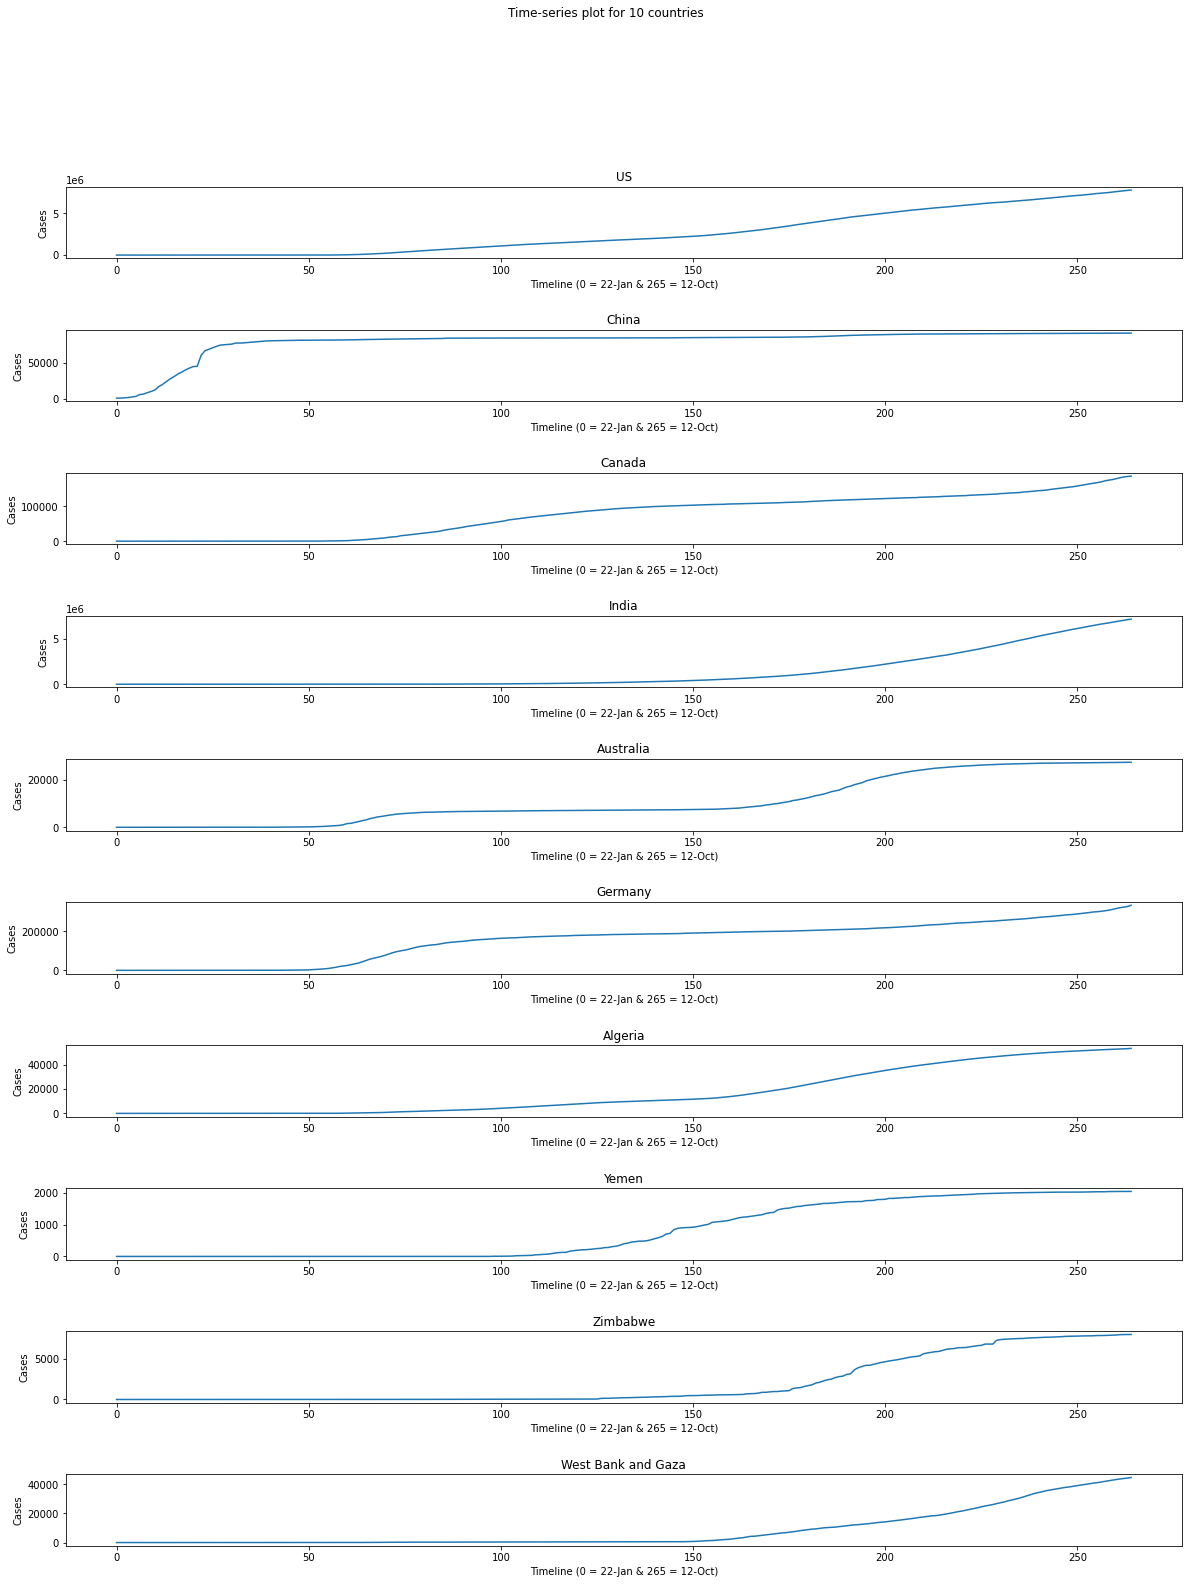

In [ ]:
#Plot the time-series for the US, China, Canada, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country.

countries = ['US','China','Canada','India','Australia','Germany','Algeria','Yemen','Zimbabwe','West Bank and Gaza']

fig, ax = plt.subplots(10,figsize=(20,25))
fig.suptitle('Time-series plot for 10 countries')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)


for i in range(0,len(countries)):
  ax[i].plot(plot_dates,cases_raw.loc[countries[i]])
  ax[i].set(xlabel='Timeline (0 = 22-Jan & 265 = 12-Oct)', ylabel='Cases',title=countries[i])
plt.show()




In [ ]:
#Apply StandardScalar to the data. Each day should have a mean of zero and a StD of 1
scaler = StandardScaler().fit(cases_raw)
cases_raw_standardized = scaler.transform(cases_raw)
cases_raw_standardized #Standardized data

df = pd.DataFrame(data=cases_raw_standardized, index=all_countries, columns=all_dates)
df

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.074935,-0.075240,-0.075753,-0.076591,-0.077541,-0.078838,-0.080415,...,-0.165118,-0.165791,-0.166255,-0.166596,-0.167228,-0.167782,-0.168450,-0.169066,-0.169633,-0.170059,-0.170348,-0.171044,-0.171496,-0.172028,-0.172584,-0.173154,-0.173495,-0.173683,-0.174326,-0.174775,-0.175313,-0.175965,-0.176586,-0.176931,-0.177226,-0.177913,-0.178325,-0.178943,-0.179485,-0.180050,-0.180448,-0.180843,-0.181674,-0.182245,-0.182862,-0.183560,-0.184207,-0.184782,-0.185131,-0.185964
Albania,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075417,-0.075930,-0.076766,-0.077715,-0.079012,-0.080587,...,-0.211653,-0.211596,-0.211397,-0.211232,-0.211465,-0.211477,-0.211509,-0.211477,-0.211366,-0.211174,-0.210975,-0.211173,-0.211072,-0.211053,-0.211039,-0.211040,-0.210846,-0.210685,-0.210844,-0.210823,-0.210993,-0.211118,-0.211261,-0.211162,-0.211110,-0.211402,-0.211397,-0.211576,-0.211657,-0.211781,-0.211700,-0.211763,-0.212315,-0.212526,-0.212768,-0.213101,-0.213395,-0.213555,-0.213634,-0.214183
Algeria,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075240,-0.075753,-0.076591,-0.077541,-0.078838,-0.080415,...,-0.153370,-0.153718,-0.153863,-0.153962,-0.154378,-0.154630,-0.155038,-0.155420,-0.155797,-0.156033,-0.156187,-0.156726,-0.157033,-0.157435,-0.157842,-0.158274,-0.158516,-0.158718,-0.159260,-0.159612,-0.160077,-0.160686,-0.161241,-0.161521,-0.161777,-0.162387,-0.162757,-0.163324,-0.163821,-0.164317,-0.164688,-0.165065,-0.165934,-0.166553,-0.167231,-0.167973,-0.168667,-0.169218,-0.169626,-0.170339
Andorra,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,-0.073634,-0.073702,-0.073528,-0.073541,-0.073616,-0.073682,-0.073777,-0.07386,-0.073945,-0.074038,-0.074183,-0.074453,-0.074793,-0.075113,-0.075417,-0.075930,-0.076766,-0.077715,-0.079012,-0.080587,...,-0.225797,-0.225743,-0.225612,-0.225569,-0.225867,-0.225994,-0.226052,-0.226106,-0.226006,-0.225911,-0.225835,-0.226019,-0.225994,-0.225967,-0.225986,-0.225890,-0.225766,-0.225704,-0.225779,-0.225805,-0.225930,-0.226075,-0.226129,-0.226039,-0.226015,-0.226209,-0.226242,-0.226350,-0.226501,-0.226634,-0.226602,-0.226753,-0.227065,-0.227349,-0.227423,-0.227838,-0.228056,-0.228293,-0.228473,-0.228786
Angola,-0.073868,-0.074185,-0.074604,-0.074391,-0.07445,-0.074206,-0.07385,-0.073896,-0.073779,-0.073867,-0.073839,-0.073624,-0.073568,-0.073523,-0.073475,-0.07345,-0.073547,-0.073562,-0.073542,-0.07365,

In [ ]:
day = ['22-Jan','28-Jan','02-Feb','18-Aug','11-Sep']
for i in day:
  mean1 = df[i].mean()
  std1 = df[i].std()
  print(mean1)
  print(std1)
  print('')


-1.0074245964191236e-16
1.0026560471747914

-1.190993218215611e-16
1.0026560471747883

-4.4056469231157003e-17
1.0026560471747858

-1.674145830783966e-17
1.0026560471747878

1.3070085871909911e-17
1.0026560471747876



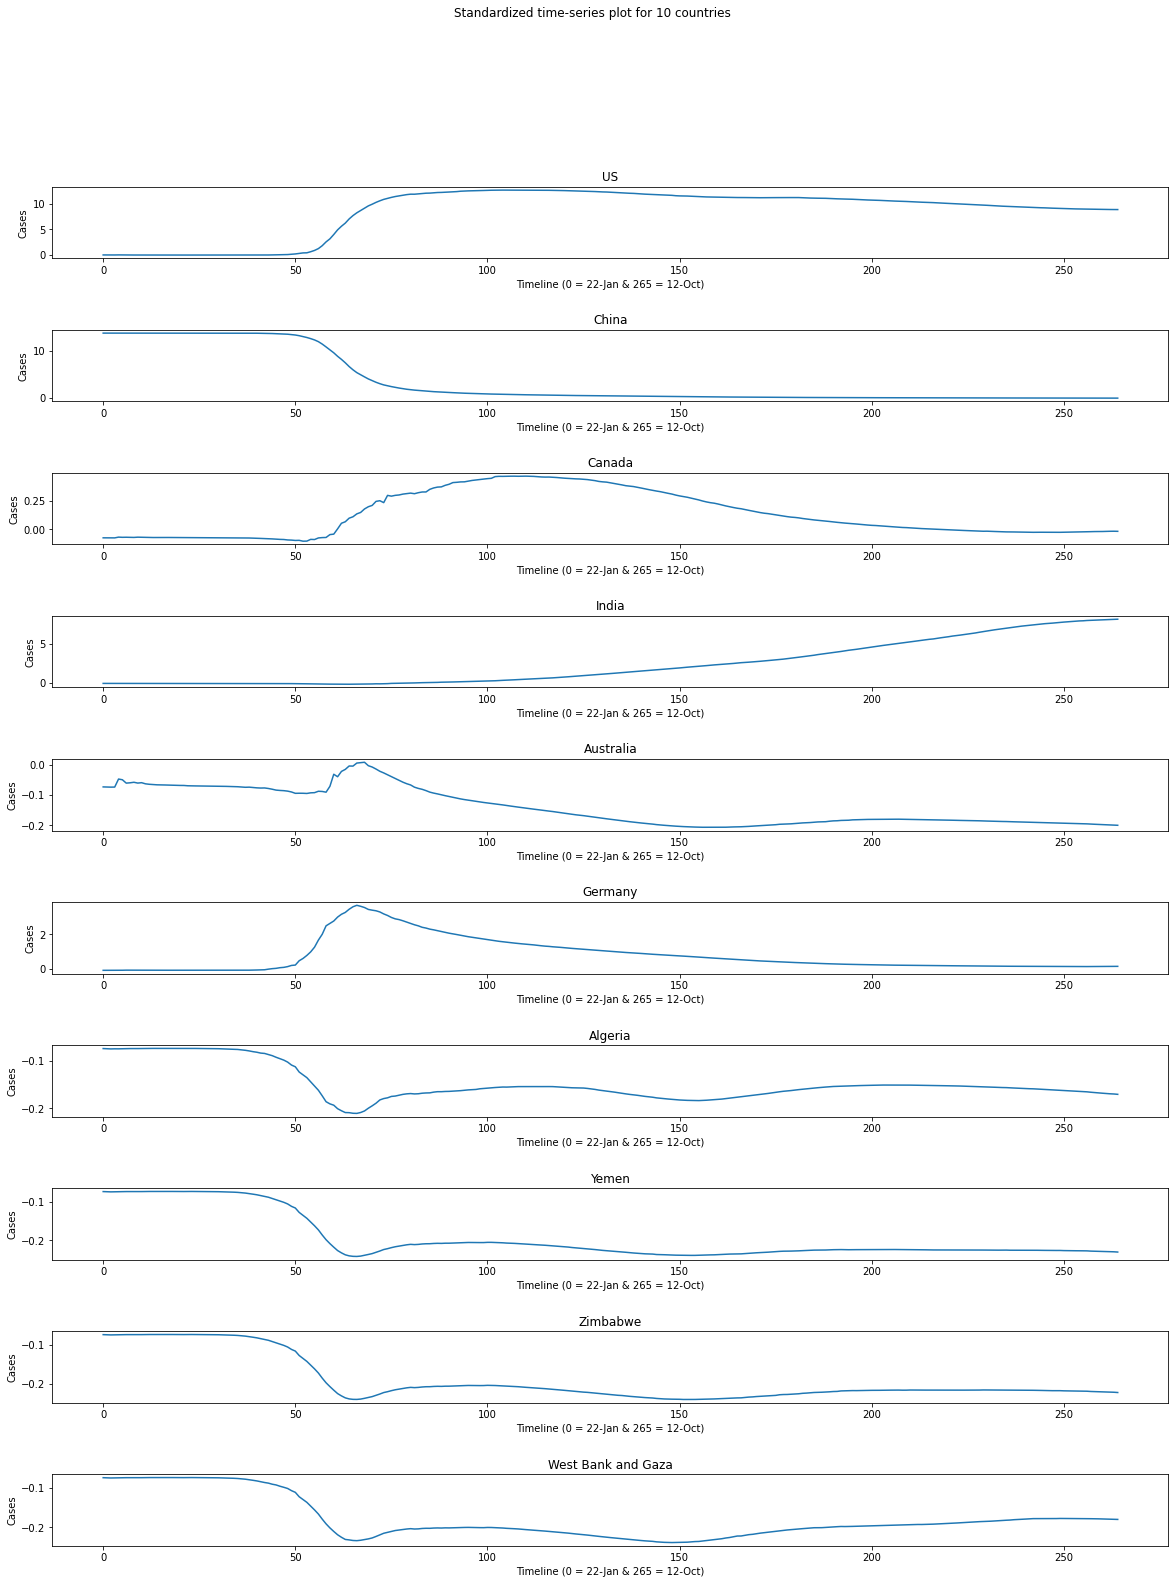

In [ ]:
#Plot the standardized time-series for the same countries as you chose in Step 1.
countries = ['US','China','Canada','India','Australia','Germany','Algeria','Yemen','Zimbabwe','West Bank and Gaza']

fig, ax = plt.subplots(10,figsize=(20,25))
fig.suptitle('Standardized time-series plot for 10 countries')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)

for i in range(0,len(countries)):
  ax[i].plot(plot_dates,df.loc[countries[i]])
  ax[i].set(xlabel='Timeline (0 = 22-Jan & 265 = 12-Oct)', ylabel='Cases',title=countries[i])
plt.show()

Discuss the trends in the standardized time-series for the US, Canada, and China. Why does it man if the curve goes up or down? What do negative and positive values mean?

Firstly, if we compare the standardized time-series for US and China, we can conclude that for the first 50-60 days the situation is exactly opposite. Although their scale of cumulative cases is same, China is at its maximum for the first 50-60 days and goes the lowest towards the end of the timeline. Whereas, US is at its lowest till 50-60 days, then reaches the maximum and reduces a bit towards the end of the timeline. Secondly, Canada shows least number of cases till the 60th day from the start and reaches a peak at about 120th day. Eventually, the number of cases reduce by the end of the timeline but not the lowest. 

The curve going up means a rise in the number of cases as the timeline proceeds and viceversa.

Negative values mean that the number of cases are lower than the mean value and Positive values mean the number of cases are higher than the mean value.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]**
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
#Compute the covariance matrix of the dataframe. Hint: The dimensions of your covariance matrix should be (265, 265)
cov_matrix = np.cov(df.T)
cov_matrix
cov_matrix.shape

(265, 265)

In [ ]:
#Compute eigenvalues and eigenvectors using np.linalg.eigh.
eigenValues, eigenVectors = np.linalg.eig(cov_matrix) 
print("Eigen Values :\n",eigenValues)
print("Eigen Vectors :\n",eigenVectors)

Eigen Values :
 [ 1.79910348e+02+0.00000000e+00j  6.20997612e+01+0.00000000e+00j
  1.88571712e+01+0.00000000e+00j  3.72685968e+00+0.00000000e+00j
  1.36617527e+00+0.00000000e+00j  2.51486418e-01+0.00000000e+00j
  1.23097195e-01+0.00000000e+00j  3.69754003e-02+0.00000000e+00j
  1.80533491e-02+0.00000000e+00j  5.90756588e-03+0.00000000e+00j
  4.87367574e-03+0.00000000e+00j  2.90579815e-03+0.00000000e+00j
  1.56039443e-03+0.00000000e+00j  1.05257194e-03+0.00000000e+00j
  6.61275216e-04+0.00000000e+00j  5.10878580e-04+0.00000000e+00j
  4.88482994e-04+0.00000000e+00j  3.64355344e-04+0.00000000e+00j
  3.15766410e-04+0.00000000e+00j  1.94627716e-04+0.00000000e+00j
  1.18306706e-04+0.00000000e+00j  1.03500585e-04+0.00000000e+00j
  8.14767927e-05+0.00000000e+00j  6.77156965e-05+0.00000000e+00j
  5.87467716e-05+0.00000000e+00j  4.96634084e-05+0.00000000e+00j
  4.47966779e-05+0.00000000e+00j  3.72721816e-05+0.00000000e+00j
  3.21825072e-05+0.00000000e+00j  2.73080399e-05+0.00000000e+00j
  2.33678

In [ ]:
#Show the effectiveness of your principal components in covering the variance of the dataset with a scree plot.
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar[:5]

array([67.53148737+0.j, 90.84137079+0.j, 97.91963412+0.j, 99.31855519+0.j,
       99.83136531+0.j])

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


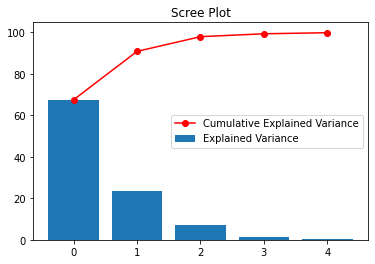

In [ ]:
plt.bar(range(5), expVar[:5], label='Explained Variance')
plt.plot(cumExpVar[:5], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.title('Scree Plot')
plt.show()

How many PCs do you need to cover 99% of the dataset's variance?

We need **4 PCs** to cover 99% of the dataset's variance.

In [ ]:
#Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots).
df_eigen_vectors = pd.DataFrame(eigenVectors,columns=all_dates)
df_eigen_vectors

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
0,-0.005448+0.000000j,0.124542+0.000000j,-0.037975+0.000000j,-0.042277+0.000000j,0.040707+0.000000j,0.029712+0.000000j,0.052259+0.000000j,0.035798+0.000000j,0.024552+0.000000j,0.043441+0.000000j,0.005002+0.000000j,0.001188+0.000000j,-0.000610+0.000000j,-0.002922+0.000000j,0.022923+0.000000j,0.116859+0.000000j,-0.087632+0.000000j,0.011422+0.000000j,-0.076494+0.000000j,-0.023562+0.000000j,-0.005152+0.000000j,0.010308+0.000000j,0.135265+0.000000j,0.079163+0.000000j,-0.107229+0.000000j,-0.118899+0.000000j,-0.067016+0.000000j,0.019918+0.000000j,0.163544+0.000000j,0.150250+0.000000j,-0.034106+0.000000j,-0.194978+0.000000j,0.152569+0.000000j,0.038092+0.000000j,-0.230904+0.000000j,-0.327403+0.000000j,0.048049+0.000000j,-0.304486+0.000000j,-0.105678+0.000000j,-0.212876+0.000000j,...,0.001828+0.000929j,0.001828-0.000929j,-0.010306+0.008904j,-0.010306-0.008904j,-0.003702-0.001978j,-0.003702+0.001978j,-0.011226+0.000861j,-0.011226-0.000861j,-0.010174+0.002139j,-0.010174-0.002139j,-0.006529+0.000000j,-0.003393-0.006581j,-0.003393+0.006581j,-0.000705+0.003541j,-0.000705-0.003541j,-0.015070-0.002095j,-0.015070+0.002095j,-0.013193-0.021346j,-0.013193+0.021346j,-0.034022-0.004880j,-0.034022+0.004880j,-0.034128-0.004969j,-0.034128+0.004969j,-0.030549-0.006035j,-0.030549+0.006035j,0.002958+0.000000j,-0.059328+0.000000j,-0.041641+0.006658j,-0.041641-0.006658j,0.025638+0.000000j,-0.026710+0.000000j,0.015063+0.000000j,-0.016339+0.000000j,0.027493+0.000000j,0.032981+0.000000j,0.000598+0.000000j,-0.105370+0.000000j,0.038188+0.000000j,-0.010178+0.000000j,-0.019592+0.000000j
1,-0.005426+0.000000j,0.124542+0.000000j,-0.037990+0.000000j,-0.042293+0.000000j,0.040700+0.000000j,0.029681+0.000000j,0.052852+0.000000j,0.037026+0.000000j,0.025233+0.000000j,0.045398+0.000000j,0.005124+0.000000j,0.000850+0.000000j,0.003288+0.000000j,-0.004201+0.000000j,0.023924+0.000000j,0.141398+0.000000j,-0.092098+0.000000j,-0.001362+0.000000j,-0.080944+0.000000j,-0.039525+0.000000j,-0.040645+0.000000j,-0.029267+0.000000j,0.173177+0.000000j,0.254823+0.000000j,-0.204487+0.000000j,-0.119546+0.000000j,-0.036395+0.000000j,0.033822+0.000000j,0.075994+0.000000j,0.005680+0.000000j,-0.024348+0.000000j,-0.071043+0.000000j,0.074331+0.000000j,-0.153504+0.000000j,-0.117219+0.000000j,-0.298708+0.000000j,-0.003153+0.000000j,0.271728+0.000000j,-0.018404+0.000000j,-0.056265+0.000000j,...,-0.004526+0.001273j,-0.004526-0.001273j,-0.000650-0.002115j,-0.000650+0.002115j,0.009711-0.000788j,0.009711+0.000788j,-0.001564+0.001202j,-0.001564-0.001202j,-0.000033-0.001840j,-0.000033+0.001840j,0.003253+0.000000j,0.002430+0.006379j,0.002430-0.006379j,-0.007233+0.000044j,-0.007233-0.000044j,0.003201+0.001305j,0.003201-0.001305j,-0.005960+0.002185j,-0.005960-0.002185j,-0.008242+0.003612j,-0.008242-0.003612j,-0.000449+0.000717j,-0.000449-0.000717j,0.001335+0.000714j,0.001335-0.000714j,-0.004948+0.000000j,0.008979+0.000000j,0.004099+0.001384j,0.004099-0.001384j,-0.007810+0.000000j,0.044496+0.000000j,0.023672+0.000000j,0.037561+0.000000j,0.009032+0.000000j,0.048456+0.000000j,-0.003329+0.000000j,0.038727+0.000000j,-0.018030+0.000000j,-0.032547+0.000000j,0.034792+0.000000j
2,-0.005474+0.000000j,0.124548+0.000000j,-0.037864+0.000000j,-0.042218+0.000000j,0.040905+0.000000j,0.029230+0.000000j,0.052501+0.000000j,0.033208+0.000000j,0.032500+0.000000j,0.033780+0.000000j,0.007895+0.000000j,-0.022116+0.000000j,0.000845+0.000000j,-0.012997+0.000000j,0.014732+0.000000j

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

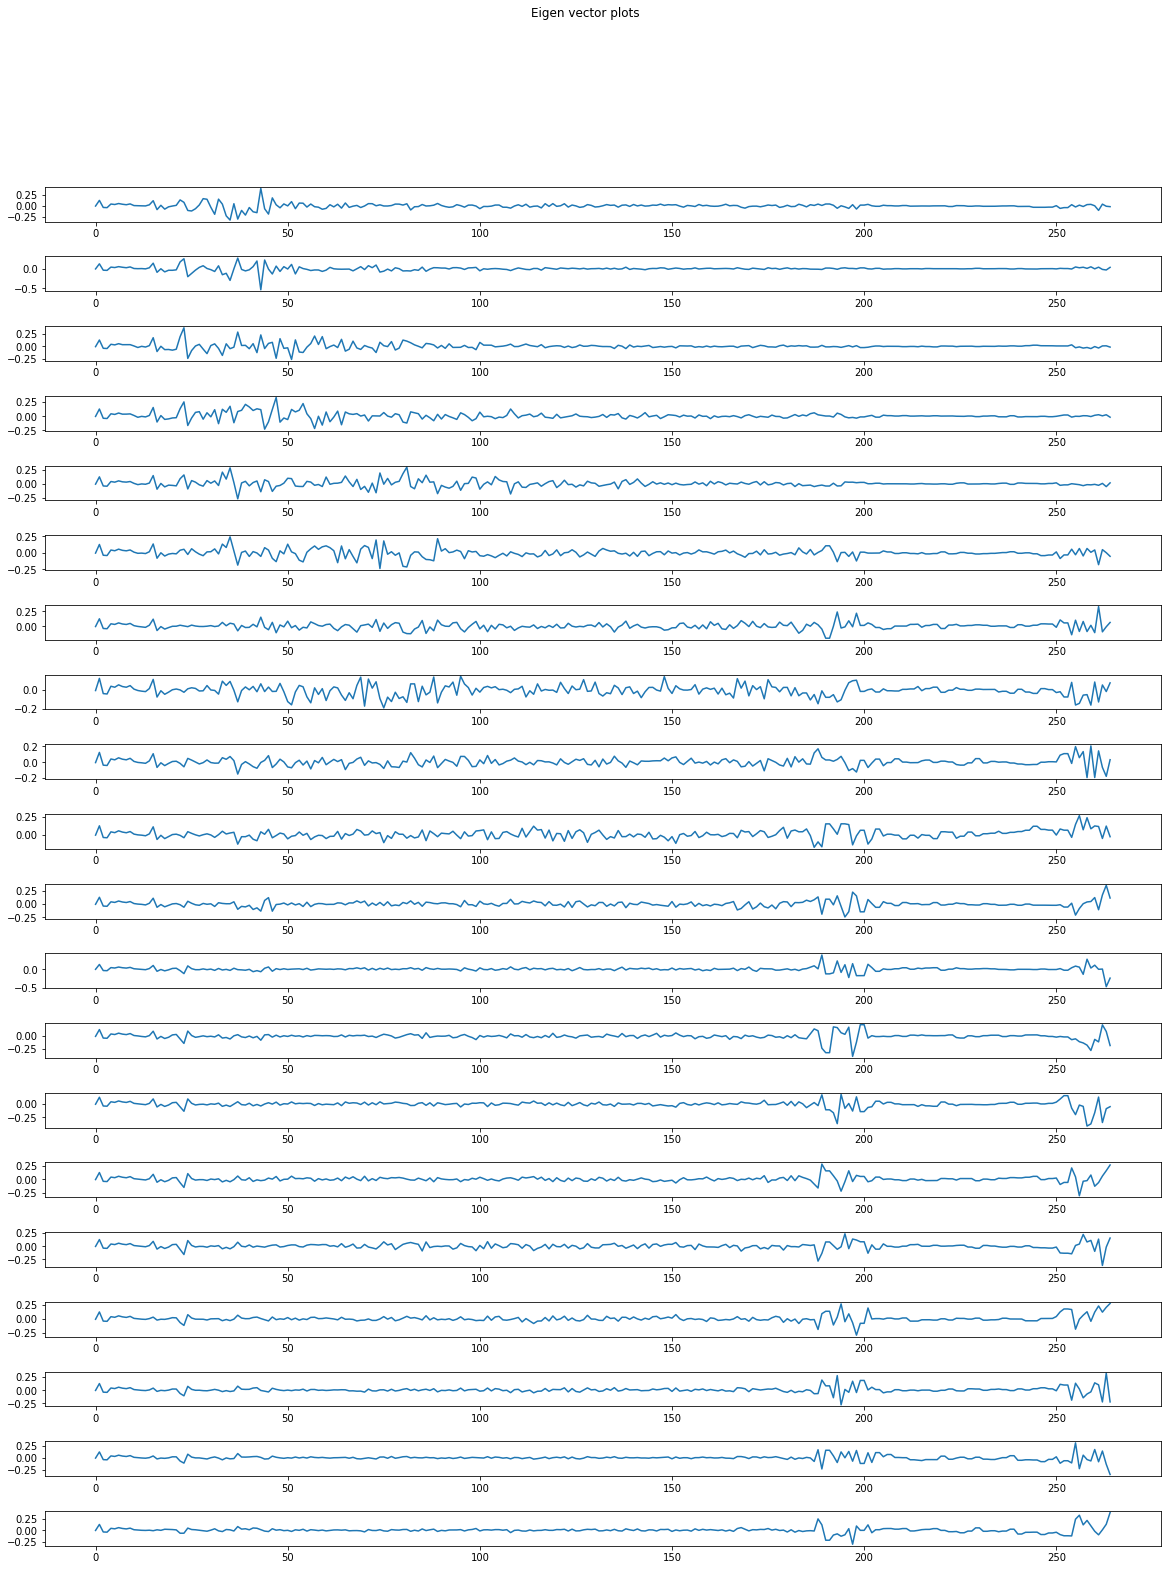

In [ ]:
fig, ax = plt.subplots(20,figsize=(20,25))
fig.suptitle('Eigen vector plots')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)

for i in range(0,20):
  ax[i].plot(plot_dates,df_eigen_vectors.loc[i])
plt.show()
  

Compare the first few PCs with the rest of them. Do you see any difference in their trend?

First few PCs show some variation from the mean (0) value in the first half of the rows of an eigen vector column whereas the rest of them show some variation in the second half of the rows of an eigen vector column.


# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
def country_cases_analysis(country):
  
  #Standardize time-series for 1 country
  plt.plot(plot_dates,df.loc[country])
  plt.ylabel('Standardized data')
  plt.xlabel('Timeline')
  plt.title('Actual time-series for the specified country')
  plt.show()

  #The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.).
  for i in range(1,11):
    country_data = np.array(df.loc[country])
    W = eigenVectors[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    plt.plot(plot_dates,ReconX,label=str(i))
    plt.ylabel('Predicted data')
    plt.xlabel('Timeline')
    plt.title('Predicted time-series for the specified country')
  plt.legend()
  plt.show()
  
  print('In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10')

  #The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series.
  for i in range(1,11):
    country_data = np.array(df.loc[country])
    W = eigenVectors[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    res_error = country_data - ReconX

    plt.plot(plot_dates,res_error,label=str(i))
    plt.ylabel('Residual error')
    plt.xlabel('Timeline')
    plt.title('Residual error time-series for the specified country')
  plt.legend()
  plt.show()
  
  print('In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10')

  #The RMSE of reconstruction as a function of number of included components.
  rmse = []
  pc_range = []
  pc_less_than_1 = []
  pc_less_than_01 = []
  pc_less_than_001 = []
  
  for i in range(1,11):
    country_data = np.array(df.loc[country])
    W = eigenVectors[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    res_error = country_data - ReconX

    rmse_calc = np.sqrt( np.sum(np.square(res_error)) / len(res_error) )
    rmse.append(rmse_calc)
    pc_range.append(i)

    if rmse_calc <= 0.01:
      pc_less_than_001.append(i)
    elif rmse_calc <= 0.1:
      pc_less_than_01.append(i)
    elif rmse_calc <= 1:
      pc_less_than_1.append(i)
    else:
      continue
  
  if not pc_less_than_001:
    pc_less_than_001.append(0)
  if not pc_less_than_01:
    pc_less_than_01.append(0)
  if not pc_less_than_1:
    pc_less_than_1.append(0)

  plt.plot(pc_range,rmse)
  plt.ylabel('Root mean squared value')
  plt.xlabel('PC Range')
  plt.title('The RMSE of reconstruction as a function of number of included components')
  plt.show()

  print('RMSE less than 1 = ',min(pc_less_than_1))
  print('RMSE less than 0.1 = ',min(pc_less_than_01))
  print('RMSE less than 0.01 = ',min(pc_less_than_001))

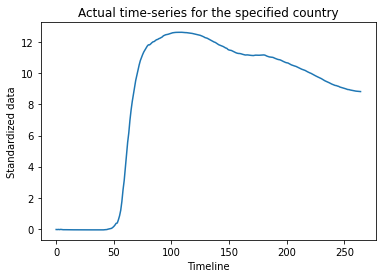

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

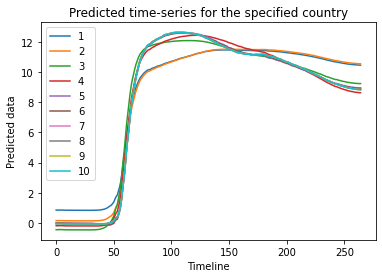

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


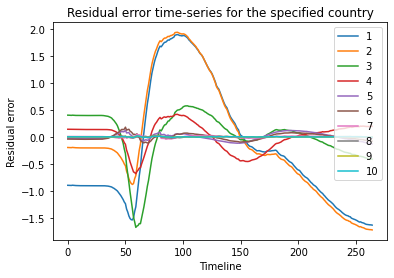

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


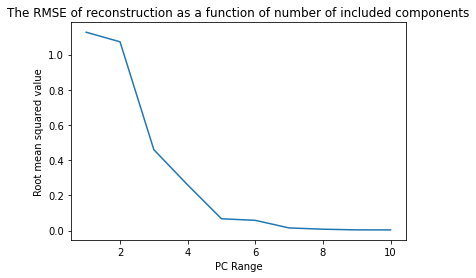

RMSE less than 1 =  3
RMSE less than 0.1 =  5
RMSE less than 0.01 =  8


In [ ]:
country_cases_analysis('US')

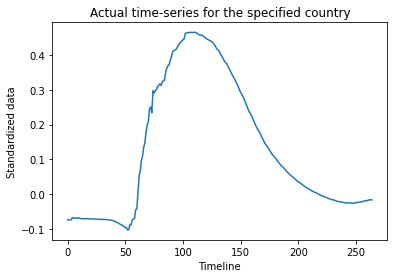

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

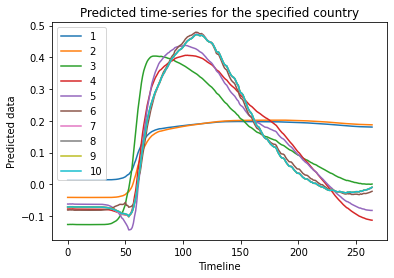

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

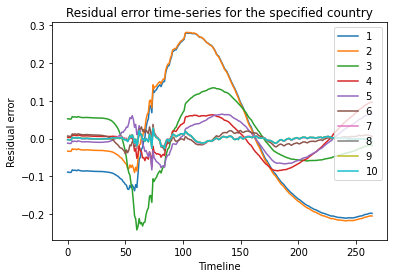

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


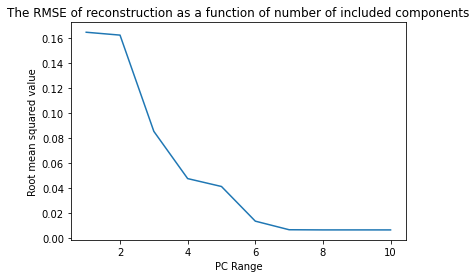

RMSE less than 1 =  1
RMSE less than 0.1 =  3
RMSE less than 0.01 =  7


In [ ]:
country_cases_analysis('Canada')

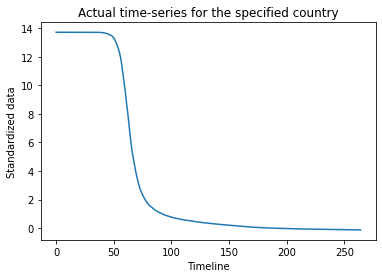

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

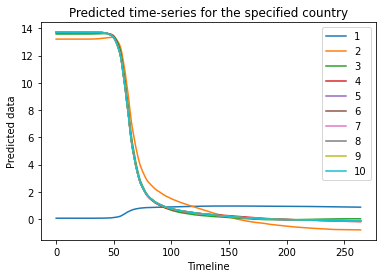

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

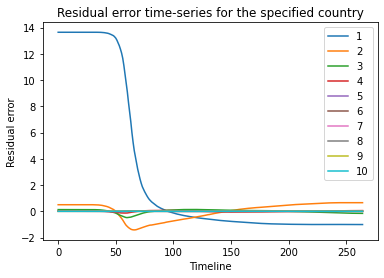

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


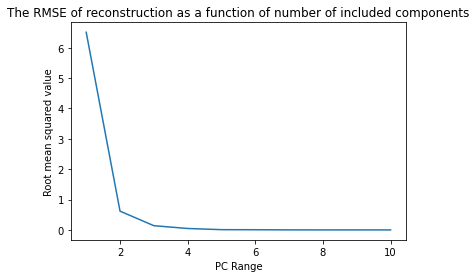

RMSE less than 1 =  2
RMSE less than 0.1 =  4
RMSE less than 0.01 =  5


In [ ]:
country_cases_analysis('China')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
death_raw

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167,170,177,181,184,190,192,198,204,210,221,226,229,243,244,250,253,262,265,269,272,274,278,285,291,299,306,311,318,321,329,330,339,349,355,359,367,378,381,387
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,571,572,572,572,573,576,576,580,582,582,583,583,583,583,585,585,585,586,586,586,586,586,587,587,587,587,587,587,587,589,589,591,592,593,593,593,593,595,595,596
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,292,292,292,295,295,297,300,300,306,312,312,320,324,326,326,329,330,330,331,331,332,332,332,332,332,332,332,332,333,333,333,333,334,335,335,335,336,337,337,345


In [ ]:
#Preprocessing the data
#Apply StandardScalar to the data. Each day should have a mean of zero and a StD of 1
scaler1 = StandardScaler().fit(death_raw)
death_raw_standardized = scaler1.transform(death_raw) #Standardized data

df1 = pd.DataFrame(data=death_raw_standardized, index=all_countries, columns=all_dates)
df1

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.173799,-0.174384,-0.174875,-0.175189,-0.177106,-0.177539,-0.177898,-0.178380,-0.178777,-0.179201,-0.179609,-0.179949,-0.180302,-0.180240,-0.180716,-0.181090,-0.181569,-0.181833,-0.182178,-0.182609,-0.183125,-0.183302,-0.183810,-0.184133,-0.184551,-0.184971,-0.185306,-0.185785,-0.186911,-0.187394,-0.187532,-0.187947,-0.188484,-0.188943,-0.189315,-0.189803,-0.190219,-0.190626,-0.190875,-0.191285
Albania,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.234208,-0.234136,-0.233990,-0.234048,-0.235777,-0.236017,-0.236001,-0.236008,-0.235852,-0.235826,-0.235841,-0.236040,-0.235915,-0.235869,-0.235838,-0.235627,-0.235582,-0.235693,-0.235919,-0.235938,-0.236094,-0.236136,-0.236205,-0.236262,-0.236443,-0.236679,-0.236668,-0.236692,-0.237483,-0.237714,-0.237630,-0.237721,-0.237994,-0.238121,-0.238155,-0.238255,-0.238422,-0.238560,-0.238683,-0.238893
Algeria,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.167257,-0.167341,-0.167331,-0.167455,-0.169237,-0.169383,-0.169378,-0.169389,-0.169430,-0.169590,-0.169668,-0.169886,-0.169753,-0.169603,-0.169681,-0.169921,-0.170156,-0.170302,-0.170485,-0.170538,-0.170719,-0.170986,-0.171367,-0.171656,-0.171964,-0.172273,-0.172489,-0.172571,-0.173536,-0.173696,-0.173767,-0.174032,-0.174458,-0.175030,-0.175427,-0.175482,-0.175790,-0.176024,-0.176221,-0.176393
Andorra,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0.073005,-0.072998,-0.072998,-0.07304,-0.073029,-0.073065,-0.073099,-0.07309,-0.073115,-0.073175,-0.07326,-0.073391,-0.073412,-0.073681,-0.07392,-0.074168,-0.074387,-0.074743,-0.075105,-0.075633,-0.076079,...,-0.247729,-0.247841,-0.247946,-0.248172,-0.250016,-0.250303,-0.250236,-0.250257,-0.250159,-0.250216,-0.250390,-0.250746,-0.250612,-0.250628,-0.250719,-0.250720,-0.250849,-0.251118,-0.251394,-0.251472,-0.251699,-0.251629,-0.251758,-0.251834,-0.252068,-0.252408,-0.252498,-0.252567,-0.253316,-0.253530,-0.253503,-0.253736,-0.254110,-0.254298,-0.254434,-0.254589,-0.254718,-0.254931,-0.255192,-0.255455
Angola,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.072932,-0.073135,-0.073105,-0.073082,-0.073063,-0.073048,-0.073035,-0.073024,-0.073013,-0

In [ ]:
day = ['22-Jan','28-Jan','02-Feb','18-Aug','11-Sep']
for i in day:
  mean1 = df1[i].mean()
  std1 = df1[i].std()
  print(mean1)
  print(std1)
  print('')

-1.2747005097548094e-16
1.002656047174786

-1.1939303161643548e-16
1.002656047174786

1.0632294574452557e-16
1.0026560471747918

-1.6888313205276853e-17
1.0026560471747876

-2.2762509102764453e-17
1.0026560471747878



In [ ]:
#Compute the covariance matrix of the dataframe. Hint: The dimensions of your covariance matrix should be (265, 265)
cov_matrix1 = np.cov(df1.T)
cov_matrix1.shape

(265, 265)

In [ ]:
#Compute eigenvalues and eigenvectors using np.linalg.eigh.
eigenValues1, eigenVectors1 = np.linalg.eig(cov_matrix1) 
print("Eigen Values :\n",eigenValues1)
print("Eigen Vectors :\n",eigenVectors1)

Eigen Values :
 [ 1.80243484e+02+0.00000000e+00j  5.87919435e+01+0.00000000e+00j
  2.06077940e+01+0.00000000e+00j  5.78056199e+00+0.00000000e+00j
  6.17555532e-01+0.00000000e+00j  2.78889141e-01+0.00000000e+00j
  5.40016381e-02+0.00000000e+00j  1.85857846e-02+0.00000000e+00j
  5.85252316e-03+0.00000000e+00j  4.16199557e-03+0.00000000e+00j
  1.99045250e-03+0.00000000e+00j  9.99852777e-04+0.00000000e+00j
  9.14198320e-04+0.00000000e+00j  7.00580804e-04+0.00000000e+00j
  4.96043655e-04+0.00000000e+00j  4.63524159e-04+0.00000000e+00j
  2.72380003e-04+0.00000000e+00j  1.85740489e-04+0.00000000e+00j
  1.54254074e-04+0.00000000e+00j  1.23124666e-04+0.00000000e+00j
  9.54061682e-05+0.00000000e+00j  6.19766024e-05+0.00000000e+00j
  5.02583601e-05+0.00000000e+00j  3.70377475e-05+0.00000000e+00j
  3.33101936e-05+0.00000000e+00j  2.61042672e-05+0.00000000e+00j
  2.08687034e-05+0.00000000e+00j  1.66180737e-05+0.00000000e+00j
  1.51652714e-05+0.00000000e+00j  1.36798308e-05+0.00000000e+00j
  1.09518

In [ ]:
def country_death_analysis(country):
  
  #Standardize time-series for 1 country
  plt.plot(plot_dates,df1.loc[country])
  plt.ylabel('Standardized data')
  plt.xlabel('Timeline')
  plt.title('Actual time-series for the specified country')
  plt.show()

  #The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.).
  for i in range(1,15):
    country_data = np.array(df1.loc[country])
    W = eigenVectors1[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    plt.plot(plot_dates,ReconX,label=str(i))
    plt.ylabel('Predicted data')
    plt.xlabel('Timeline')
    plt.title('Predicted time-series for the specified country')
  plt.legend()
  plt.show()
  
  print('In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10')

  #The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series.
  for i in range(1,15):
    country_data = np.array(df1.loc[country])
    W = eigenVectors1[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    res_error = country_data - ReconX

    plt.plot(plot_dates,res_error,label=str(i))
    plt.ylabel('Residual error')
    plt.xlabel('Timeline')
    plt.title('Residual error time-series for the specified country')
  plt.legend()
  plt.show()
  
  print('In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10')

  #The RMSE of reconstruction as a function of number of included components.
  rmse = []
  pc_range = []
  pc_less_than_1 = []
  pc_less_than_01 = []
  pc_less_than_001 = []
  
  for i in range(1,15):
    country_data = np.array(df1.loc[country])
    W = eigenVectors1[:, 0:i]
    projX = np.dot(country_data, W)
    ReconX = np.dot(projX, W.T)

    res_error = country_data - ReconX

    rmse_calc = np.sqrt( np.sum(np.square(res_error)) / len(res_error) )
    rmse.append(rmse_calc)
    pc_range.append(i)

    if rmse_calc <= 0.01:
      pc_less_than_001.append(i)
    elif rmse_calc <= 0.1:
      pc_less_than_01.append(i)
    elif rmse_calc <= 1:
      pc_less_than_1.append(i)
    else:
      continue
    
  if not pc_less_than_001:
    pc_less_than_001.append(0)
  if not pc_less_than_01:
    pc_less_than_01.append(0)
  if not pc_less_than_1:
    pc_less_than_1.append(0)

  plt.plot(pc_range,rmse)
  plt.ylabel('Root mean squared value')
  plt.xlabel('PC Range')
  plt.title('The RMSE of reconstruction as a function of number of included components')
  plt.show()

  print('RMSE less than 1 = ',min(pc_less_than_1))
  print('RMSE less than 0.1 = ',min(pc_less_than_01))
  print('RMSE less than 0.01 = ',min(pc_less_than_001))

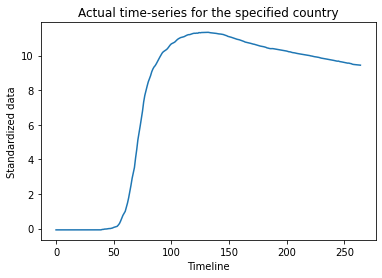

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

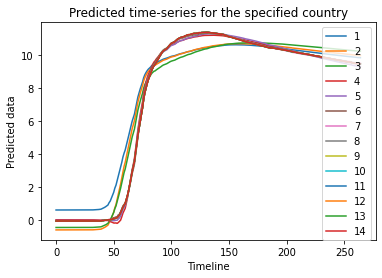

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

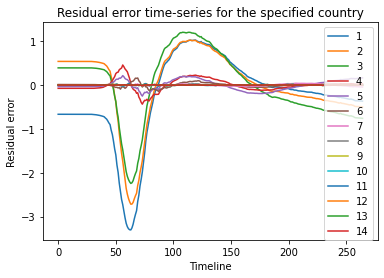

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


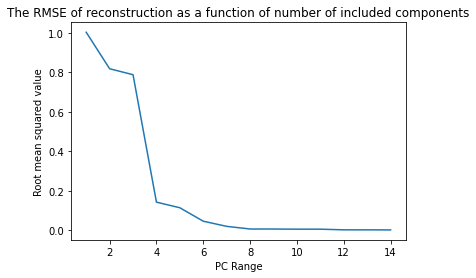

RMSE less than 1 =  2
RMSE less than 0.1 =  6
RMSE less than 0.01 =  8


In [ ]:
country_death_analysis('US')

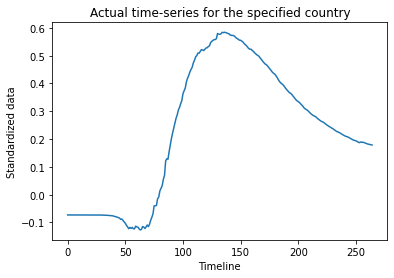

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

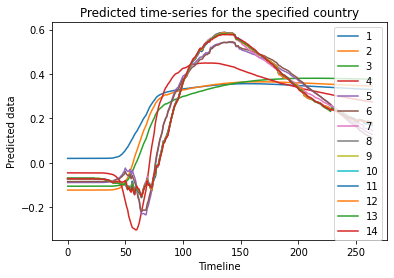

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

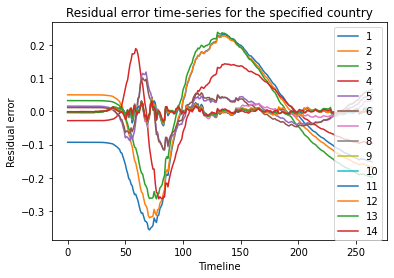

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


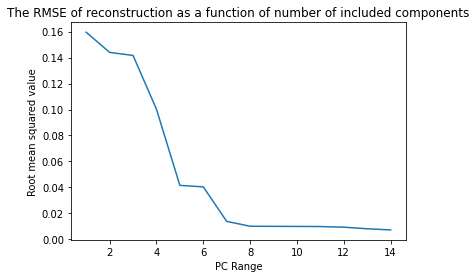

RMSE less than 1 =  1
RMSE less than 0.1 =  5
RMSE less than 0.01 =  11


In [ ]:
country_death_analysis('Canada')

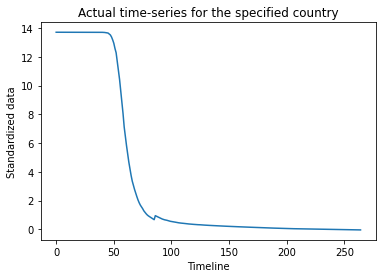

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

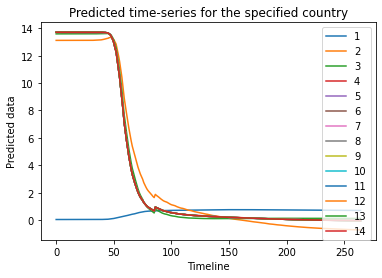

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

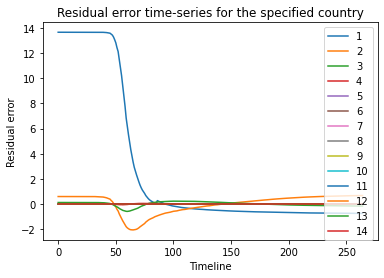

In legend, 1 = PC1, 2 = PC1+PC2, 3 = PC1+PC2+PC3,.....,10 = PC1+PC2+PC3+PC4...+PC10


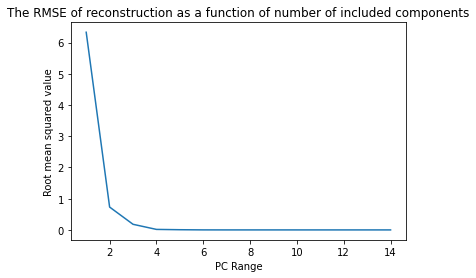

RMSE less than 1 =  2
RMSE less than 0.1 =  4
RMSE less than 0.01 =  5


In [ ]:
country_death_analysis('China')

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


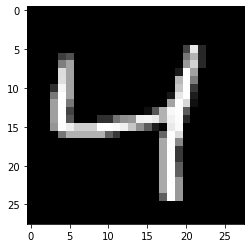

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

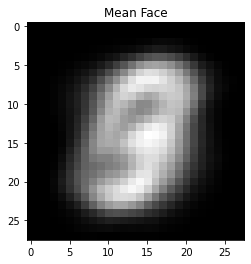

In [ ]:
#Compute the covariance of the dataframe and perform eigendecomposition.
#Computing mean face
XMat = x
meanImage = np.reshape(XMat.mean(axis=0), x[0].shape)
plt.imshow(meanImage.reshape(28,28), cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

In [ ]:
XMat.shape

(1000, 784)

In [ ]:
#Standardising the data
mu = x.mean(axis=0)
x = x - mu

#Computing covariance, eigenvalues and eigenvectors
C = np.dot(x.T,x) #covariance matrix
eigenValues_im, eigenVectors_im = np.linalg.eigh(C)
print("Eigen Values:\n",eigenValues_im)
print("Eigen Vectors:\n",eigenVectors_im)

Eigen Values:
 [-3.57574003e-08 -2.36732475e-08 -2.10169155e-08 -1.99865542e-08
 -1.51788293e-08 -1.48628150e-08 -9.70515592e-09 -6.79666147e-09
 -5.36934395e-09 -4.40391591e-09 -3.58986637e-09 -2.15188082e-09
 -1.59417892e-09 -1.38928047e-09 -1.28977035e-09 -1.10427616e-09
 -1.10226354e-09 -8.56716707e-10 -7.55028428e-10 -6.32870171e-10
 -5.76853932e-10 -4.75988181e-10 -3.67949898e-10 -3.23258507e-10
 -2.78952979e-10 -2.42821157e-10 -2.24296890e-10 -1.84365437e-10
 -1.68619994e-10 -1.22605279e-10 -1.17850823e-10 -1.08695164e-10
 -9.41661195e-11 -9.22567475e-11 -8.07902399e-11 -6.74749021e-11
 -6.44518818e-11 -5.85275352e-11 -4.91369849e-11 -3.58371730e-11
 -3.22795452e-11 -2.88830441e-11 -2.88114168e-11 -2.38589021e-11
 -2.28200192e-11 -2.16851113e-11 -2.10906384e-11 -1.66917643e-11
 -1.60245098e-11 -1.47077244e-11 -9.99268292e-12 -9.03585733e-12
 -6.61717538e-12 -5.51475671e-12 -5.22815566e-12 -3.17510342e-12
 -3.55843074e-13 -1.71060839e-13 -8.11198948e-25 -3.51091687e-25
 -1.409710

In [ ]:
#Sorting
args = (-eigenValues_im).argsort()
eigenValues_im = eigenValues_im[args]
eigenVectors_im = eigenVectors_im[:, args]

In [ ]:
#Plot the first 10 eigenvectors. What trends do you observe? 
df_eigen_vectors_im= pd.DataFrame(eigenVectors_im)
df_eigen_vectors_im

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


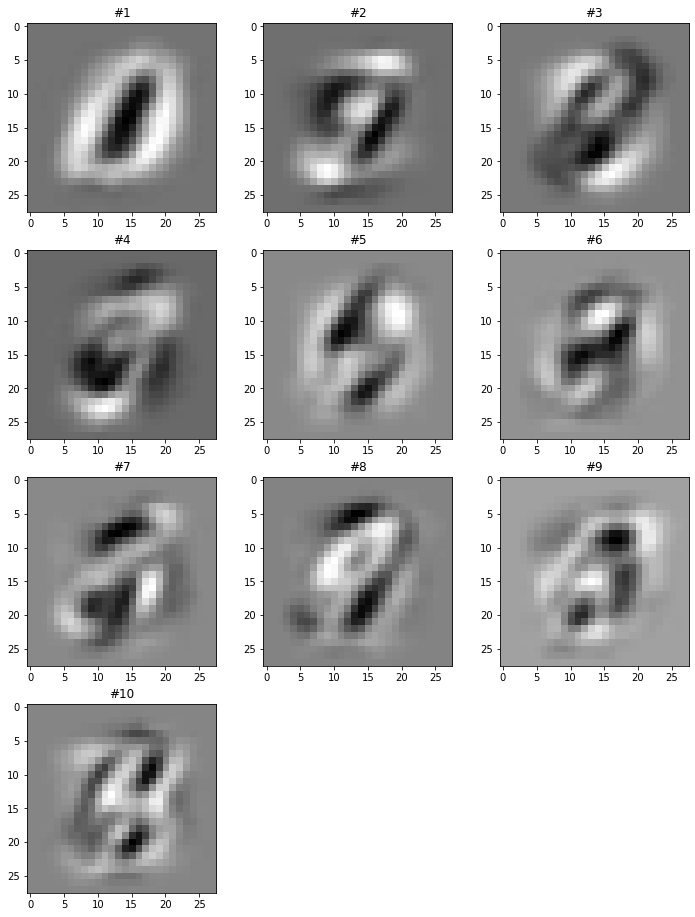

In [ ]:
# print first 10 eigen faces
import math
COUNT = 10
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors_im[:, i].reshape(28,28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

All eigen faces shown above display a greyish background color. The contents in the centre are very blurr which are the building blocks for a reconstructed image.

In [ ]:
#Create a function that requires an argument n and plots a random image from the dataset, as well as n plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.)
import random
import math
X = mu + x
def image_recognition(n):
  
  #Plots a random image from the dataset
  image_number = random.randint(0, 1000)
  plt.gray() 
  plt.imshow(X[image_number].reshape(28,28)) 
  print ("Label is:", y[image_number])
  plt.show()

  #Create reconstructed images
  numEvsSet = [] # these no. of eigenVectors will be used to reconstruct the image.
  for i in range(1,n+1,int(n/10)):
    numEvsSet.append(i)
  COUNT = len(numEvsSet)
  reconImages = []
  for numEvs in numEvsSet:
    W = eigenVectors_im[:, 0:numEvs]
    P = np.dot(x[image_number].reshape(1,784),W)
    R = np.dot(P,W.T)
    reconImages.append(R.reshape(28,28))
  
  #Plot reconstructed images
  ROWS = math.ceil(COUNT/3)
  fig = plt.figure(figsize=(12, ROWS * 4))
  for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title("Reconstruction:"+ str(numEvsSet[i]) + " Components" )
 
  
    

Label is: 6


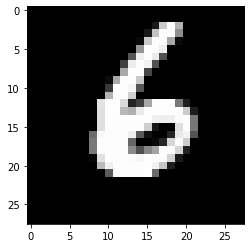

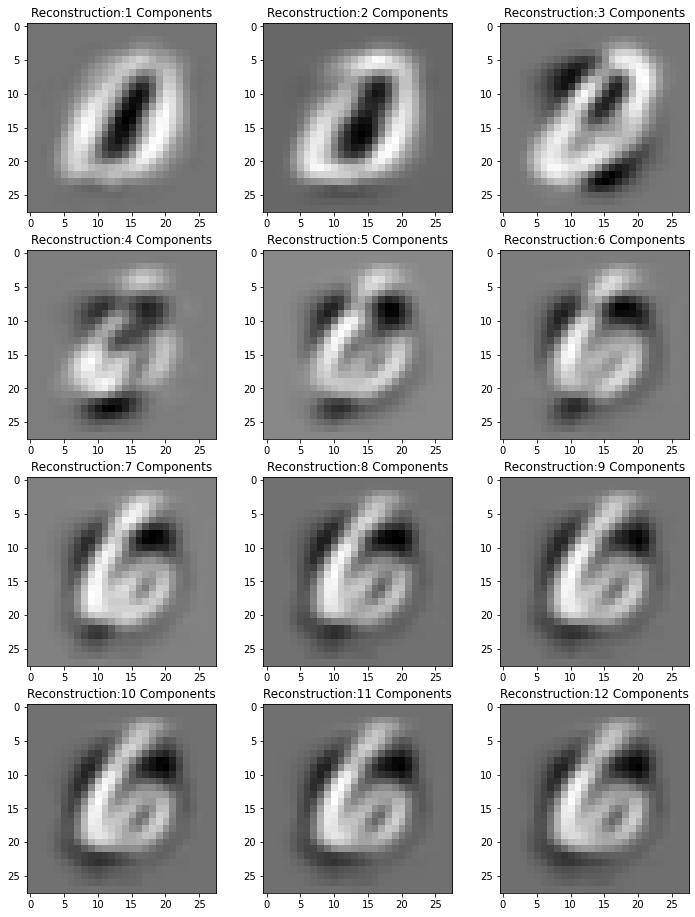

In [ ]:
#Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits.
image_recognition(12)

Label is: 8


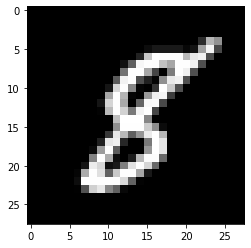

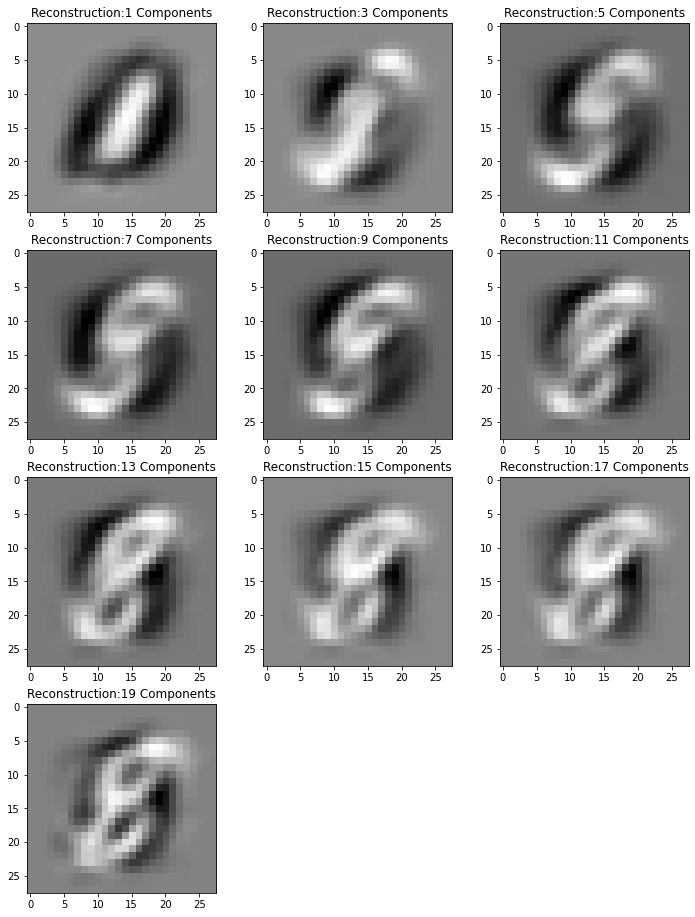

In [ ]:
image_recognition(20)

Label is: 8


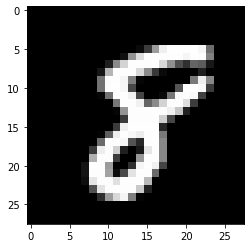

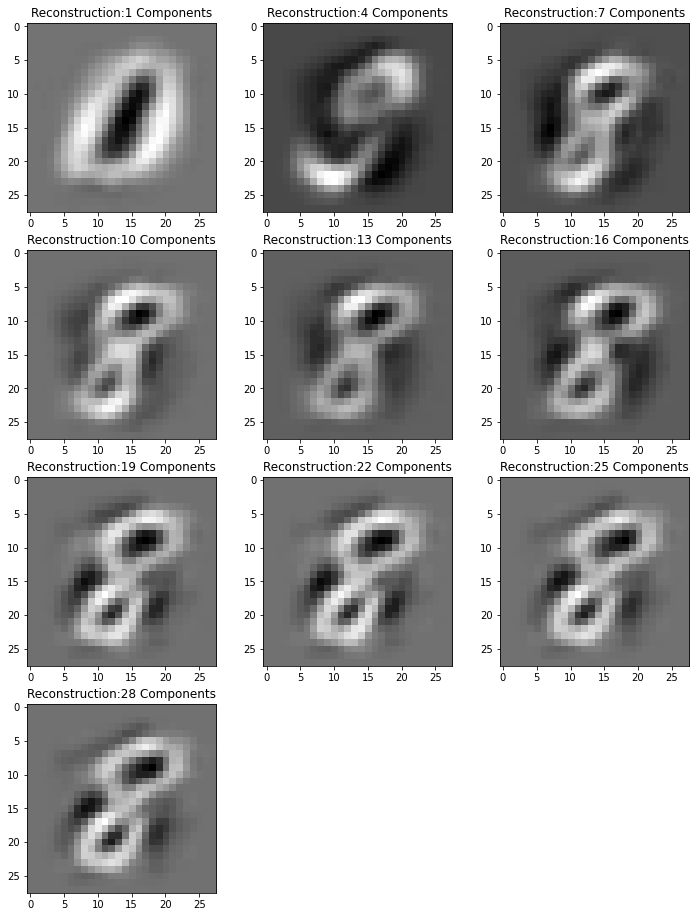

In [ ]:
image_recognition(30)

Label is: 1


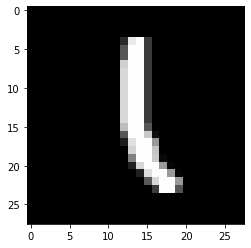

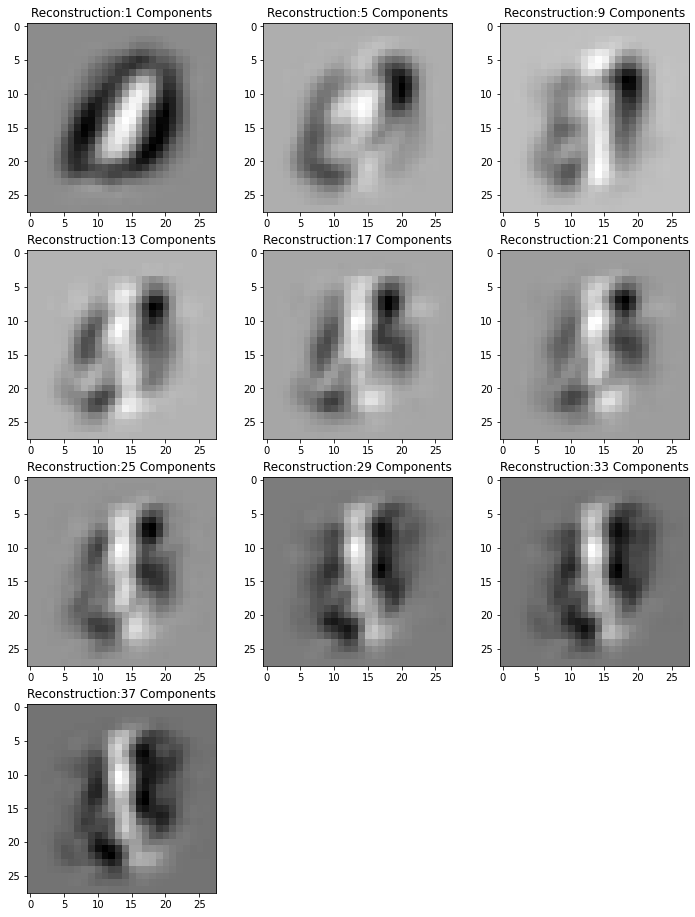

In [ ]:
image_recognition(40)

Label is: 8


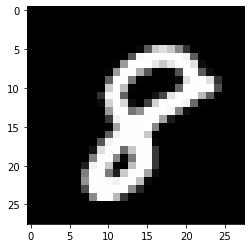

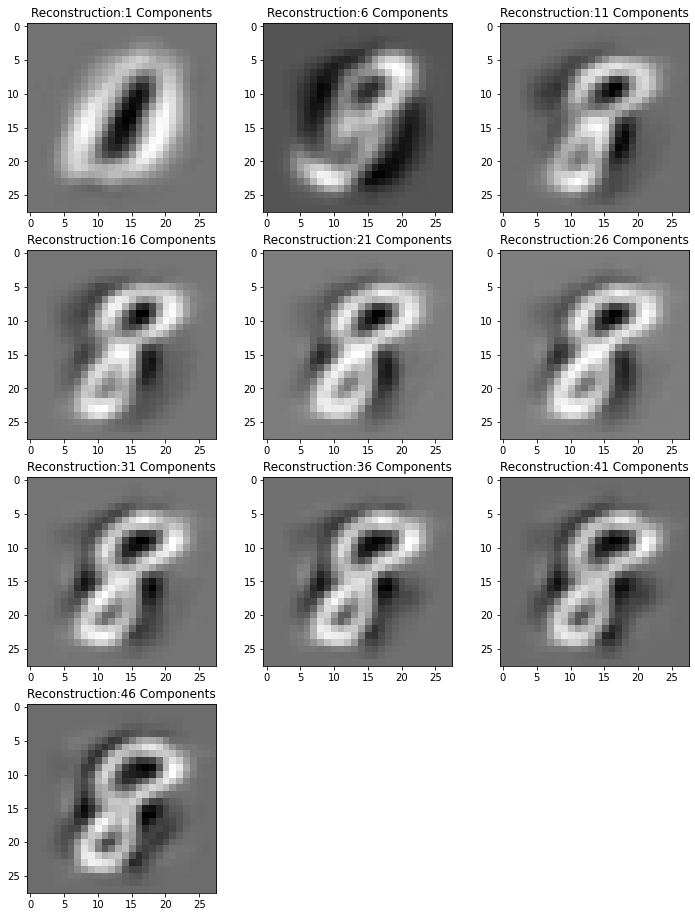

In [ ]:
image_recognition(50)

Label is: 2


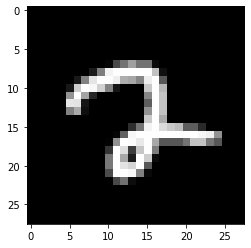

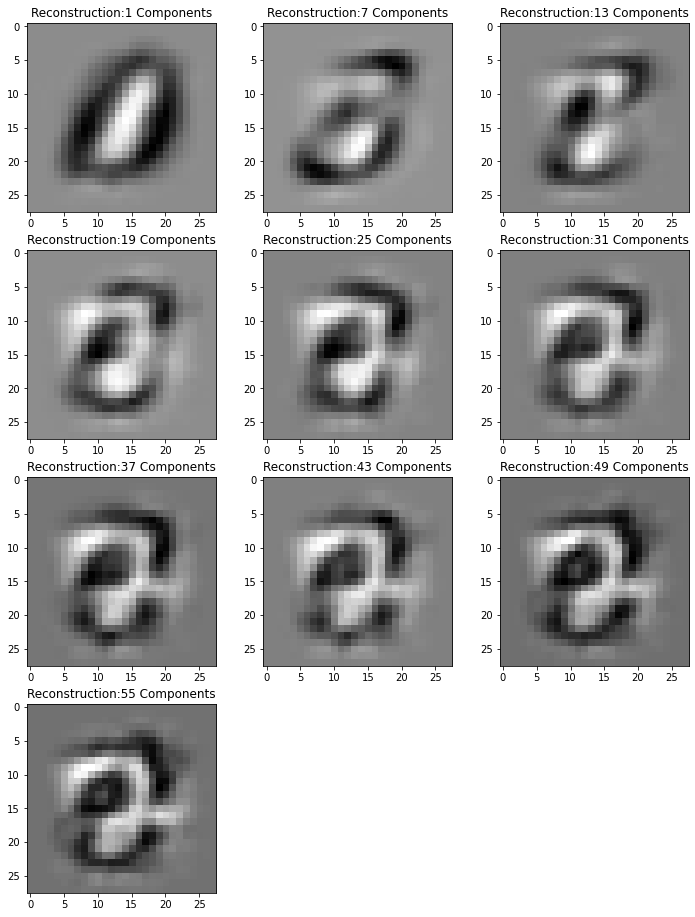

In [ ]:
image_recognition(60)

Label is: 6


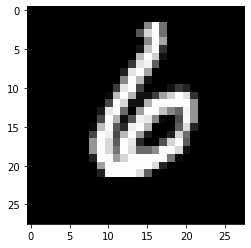

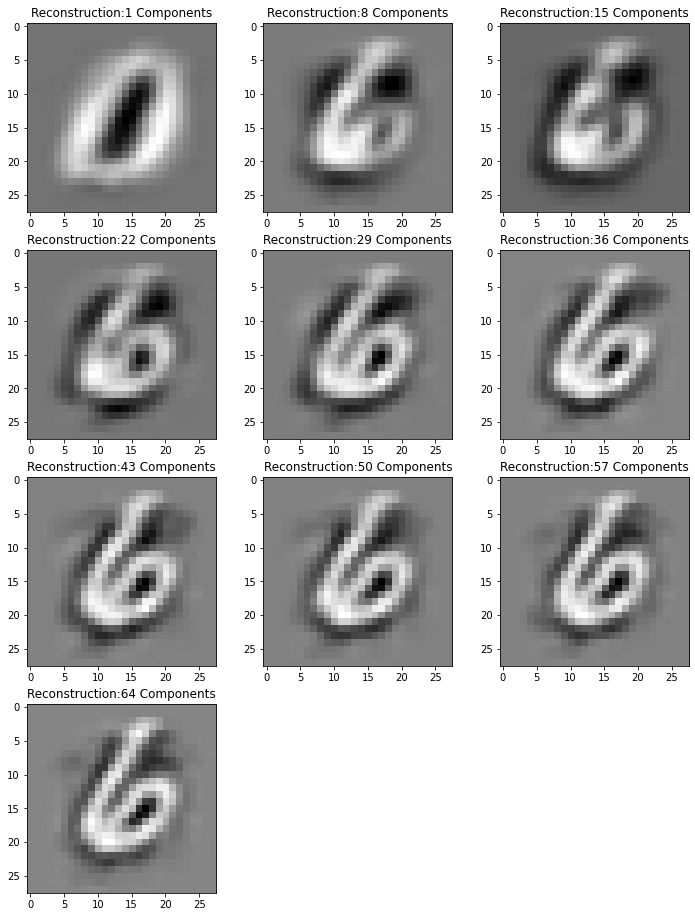

In [ ]:
image_recognition(70)

Label is: 1


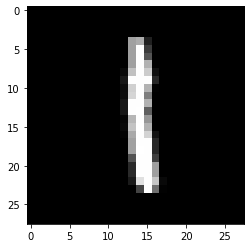

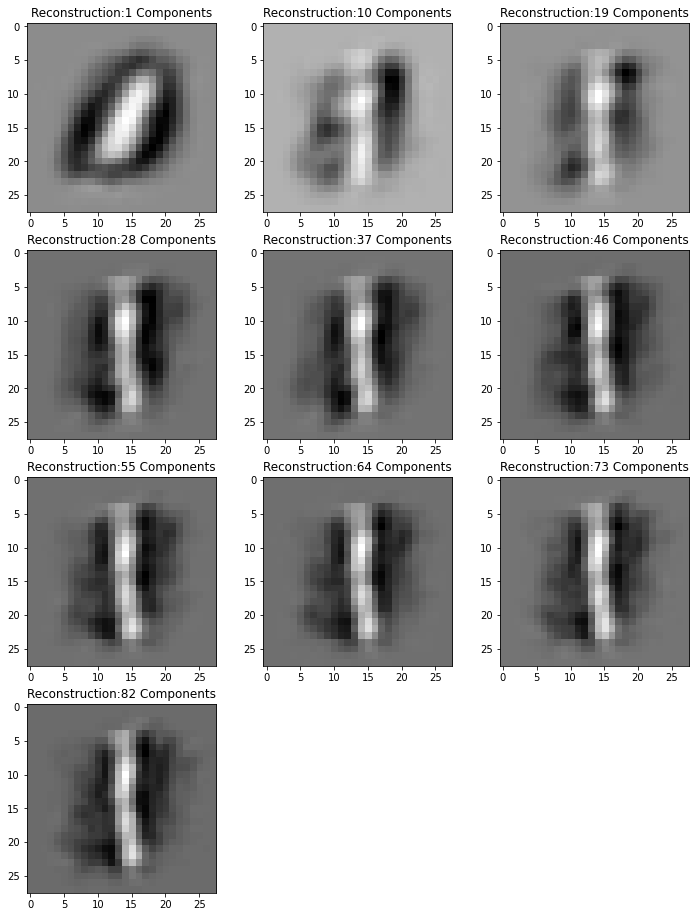

In [ ]:
image_recognition(90)

The best 'n' value selected is **64**

In [ ]:
#With that many components, what would be the compression ratio for a dataset with 1000 images? Hint: compare the dataset size with a case where we only use principal components and projections
n_value = 64
m1,n1 = x.shape
m2,n2 = eigenVectors_im[:, 0:n_value].shape
proj = np.dot(x,eigenVectors_im[:, 0:n_value])
m3,n3 = proj.shape

comp_ratio = (m1*n1) / ((m2*n2)+(m3*n3))
print('Compression ratio is %.2f'%comp_ratio)

Compression ratio is 6.87


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


